In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

# Main Question

1. Load the data, display the first 5 rows and summarize the information.
2. Identify missing data and suggest how to address them.
3. Calculate basic statistics (mean, median, etc.) for length and weight.
4. Count and create a bar chart of the number of crocodiles by conservation status.
5. Create a scatter plot to see the relationship between length and weight.
6. Calculate the average crocodile length for each age class.
7. Convert the date column to 'datetime' format and create a year column.
8. Explain how to test for weight differences between male and female crocodiles.
9. What features and models would you use to predict crocodile weight?
10. What metrics would be appropriate for evaluating the weight prediction model?

In [2]:
df=pd.read_csv(r"C:\Users\FARUQ\Downloads\archive (2)\crocodile_dataset.csv") #load the dataset

## 1. Load the data, display the first 5 rows

In [3]:
df.head(2)

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...


## 2. Identify missing data 

In [4]:
df.isnull().sum() #checking Nan value

Observation ID          0
Common Name             0
Scientific Name         0
Family                  0
Genus                   0
Observed Length (m)     0
Observed Weight (kg)    0
Age Class               0
Sex                     0
Date of Observation     0
Country/Region          0
Habitat Type            0
Conservation Status     0
Observer Name           0
Notes                   0
dtype: int64

In [5]:
print(df['Observed Length (m)'].unique(),df['Observed Weight (kg)'].unique(),df['Sex'].unique()) #checking if any 

[1.9  4.09 1.08 2.42 3.75 2.64 2.85 0.35 3.05 3.39 1.22 1.84 2.63 3.65
 1.32 2.   1.98 4.37 1.07 1.55 2.52 4.65 1.77 2.44 3.18 0.34 3.94 3.22
 4.71 2.04 4.11 1.01 0.76 2.26 1.48 2.96 1.05 2.72 3.25 3.57 0.29 2.33
 2.5  3.04 3.4  2.43 2.51 0.96 5.83 2.97 0.43 2.05 5.43 2.56 1.18 3.78
 1.93 1.25 2.23 3.66 1.85 4.9  1.2  2.9  4.34 2.54 2.15 2.13 1.69 5.07
 1.1  3.02 1.6  2.31 0.79 1.23 2.82 2.76 2.45 3.32 3.88 1.96 1.21 2.7
 3.08 2.4  2.71 2.21 4.86 2.27 2.58 2.93 2.28 3.07 2.57 2.46 3.59 1.59
 4.68 5.1  4.55 5.22 0.86 2.69 1.37 3.19 2.87 2.88 2.07 1.52 1.57 2.81
 1.94 3.11 2.36 3.68 3.41 1.47 2.17 1.53 0.88 3.13 3.27 0.16 6.02 0.6
 0.94 2.22 3.1  2.75 5.48 3.85 1.13 0.36 4.21 1.49 1.04 2.79 1.12 3.7
 2.98 5.32 2.1  2.01 0.5  1.03 0.87 2.18 2.74 1.   0.99 2.89 3.58 0.56
 2.25 4.62 1.83 1.51 5.91 3.09 2.61 0.93 1.64 0.33 2.03 2.77 2.78 1.92
 1.4  1.79 2.99 0.82 3.14 1.74 2.94 1.88 1.99 1.46 2.14 1.42 3.55 2.8
 1.24 2.86 0.38 3.56 3.51 3.53 3.06 1.56 0.58 4.   2.68 2.08 5.18 2.67
 4.19 1.28

## 3. Calculate basic statistics (mean, median, etc.) for length and weight.

In [6]:
df["Observation ID"]=df["Observation ID"].astype('object')
df.describe()

,Observed Length (m),Observed Weight (kg)
count,1000.000000,1000.000000
mean,2.415110,155.771900
std,1.097542,175.186788
min,0.140000,4.400000
25%,1.637500,53.225000
50%,2.430000,100.600000
75%,3.010000,168.875000
max,6.120000,1139.700000


## 4. Count and create a bar chart of the number of crocodiles by conservation status

In [7]:
df_conservation=df.groupby('Conservation Status',as_index=True)['Observation ID'].count()
df_conservation=df_conservation.reset_index()
df_conservation.head()

,Conservation Status,Observation ID
0,Critically Endangered,275
1,Data Deficient,115
2,Endangered,56
3,Least Concern,384
4,Vulnerable,170


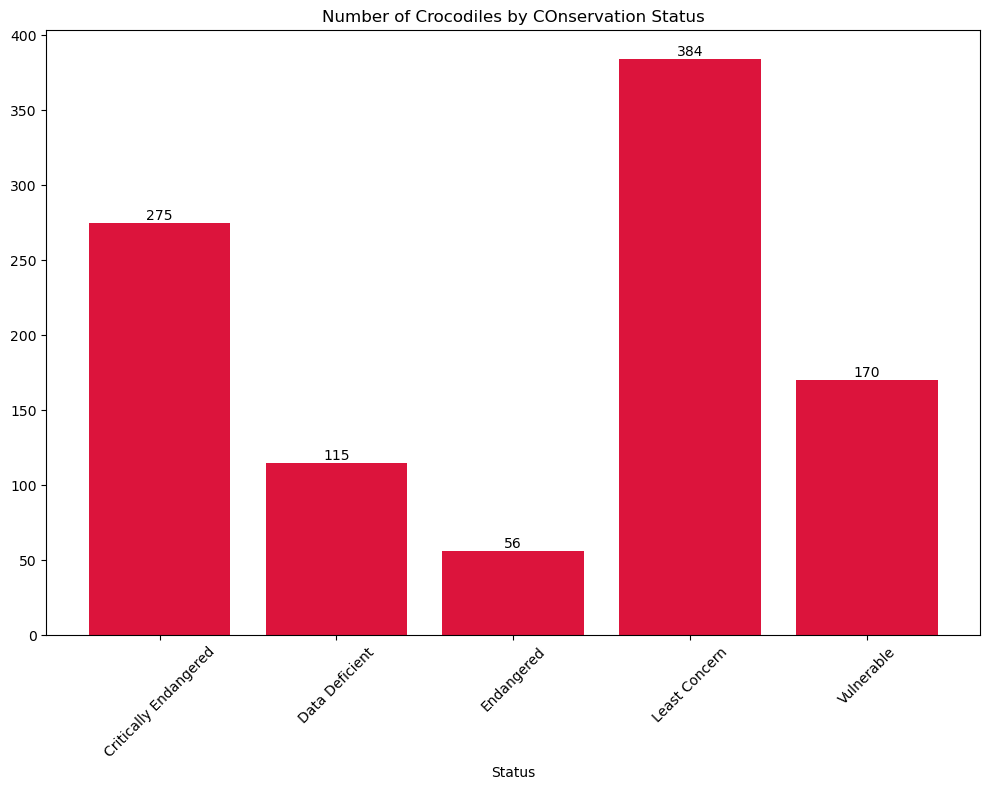

In [8]:
plt.figure(figsize=(10,8))
bars=plt.bar(df_conservation['Conservation Status'],df_conservation['Observation ID'],color='crimson')
plt.title('Number of Crocodiles by COnservation Status')
plt.xlabel('Status')
plt.xticks(rotation=45)
plt.bar_label(bars)
plt.tight_layout()
plt.show()#visualize

## 5. Create a scatter plot to see the relationship between length and weight.

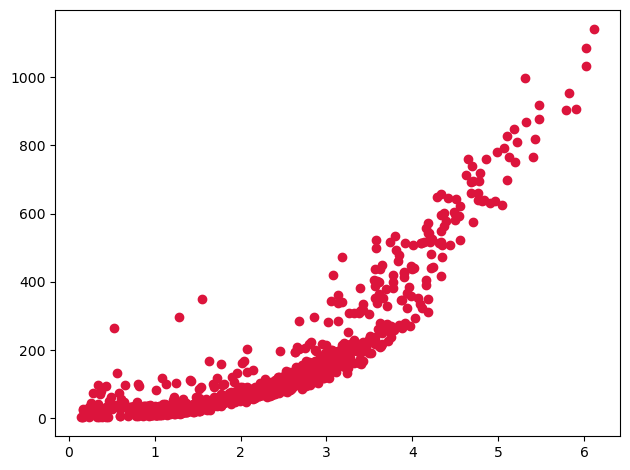

In [9]:
plt.scatter(df['Observed Length (m)'],df['Observed Weight (kg)'],color='crimson',marker='o')
plt.tight_layout()
plt.show()

In [10]:
correlation = df['Observed Weight (kg)'].corr(df['Observed Length (m)'])
print(correlation)

0.843435206362499


## 6. Calculate the average crocodile length for each age class

In [11]:
df[['Age Class','Observed Length (m)']].head()#checking

,Age Class,Observed Length (m)
0,Adult,1.90
1,Adult,4.09
2,Juvenile,1.08
3,Adult,2.42
4,Adult,3.75


In [12]:
df['Age Class'].unique()

array(['Adult', 'Juvenile', 'Subadult', 'Hatchling'], dtype=object)

In [13]:
df_length=df.groupby('Age Class',as_index=True)['Observed Length (m)'].mean()#groupby
df_length=df_length.reset_index()#series to dataframe
df_length=df_length.sort_values(by='Observed Length (m)', ascending=False)
df_length[['Age Class','Observed Length (m)']].head()#display

,Age Class,Observed Length (m)
0,Adult,2.835784
3,Subadult,2.625547
2,Juvenile,1.546701
1,Hatchling,0.414082


## 7. Convert the date column to 'datetime' format and create a year column.

In [14]:
df['Date of Observation'].head()

0    31-03-2018
1    28-01-2015
2     7/12/2010
3     1/11/2019
4    15-07-2019
Name: Date of Observation, dtype: object

In [15]:
df['Date of Observation']=pd.to_datetime(df['Date of Observation'], 
                                          errors='coerce', #convert to NaT
                                         format='mixed', #notify that the format is mixed
                                          dayfirst=True #tell that day is the first format)

_IncompleteInputError: incomplete input (2594763919.py, line 4)

In [ ]:
print(df['Date of Observation'])

## 8. Explain how to test for weight differences between male and female crocodiles

In [ ]:
df['Sex'].unique() #check

In [ ]:
df_sex=df.groupby('Sex',as_index=False).agg({
    'Observed Weight (kg)': ['sum', 'mean','count']
})#groupby to calculate teh sum and mean

df_sex.columns = ['Sex', 'Total_Weight', 'Mean_Weight','Count Weight']#define the columns
diff_total =  df_sex.loc[1, 'Total_Weight'] - df_sex.loc[0, 'Total_Weight']
diff_mean = df_sex.loc[1, 'Mean_Weight'] - df_sex.loc[0, 'Mean_Weight']
diff_count = df_sex.loc[1, 'Count Weight'] - df_sex.loc[0, 'Count Weight'] 
df_sex.loc[len(df_sex)] = ['Difference (Male - Female)', diff_total, diff_mean,diff_count] #added the new row contain the different between male and female

df_sex.head()

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
total=plt.bar(df_sex['Sex'],df_sex['Total_Weight'],color='skyblue')
plt.title('Total Weight by Sex (kg)')
plt.bar_label(total)

plt.subplot(1,3,2)
ave=plt.bar(df_sex['Sex'],df_sex['Mean_Weight'],color='red')
plt.title('Mean Weight by Sex (kg)')
plt.bar_label(ave)

plt.subplot(1,3,3)
num=plt.bar(df_sex['Sex'],df_sex['Count Weight'],color='green')
plt.title('Count Weight by Sex')
plt.bar_label(num)

plt.tight_layout()
plt.show()

## 9. What features and models would you use to predict crocodile weight?

In [ ]:
# Feature engineering
df['Year'] = pd.to_datetime(df['Date of Observation'], dayfirst=True).dt.year
df['Age Class'] = df['Age Class'].map({'Hatchling': 0, 'Juvenile': 1, 'Subadult': 2, 'Adult': 3})

# Define features and target
features = ['Observed Length (m)', 'Age Class', 'Year', 'Sex', 'Country/Region', 'Habitat Type']
X = df[features]
y = df['Observed Weight (kg)']

# Preprocessing: Scale numerical, encode categorical
numerical_features = ['Observed Length (m)', 'Age Class', 'Year']
categorical_features = ['Sex', 'Country/Region', 'Habitat Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with a model (e.g., Random Forest)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.2f}")

## 10. What metrics would be appropriate for evaluating the weight prediction model?

In [ ]:
# Evaluasi model Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Menggunakan np.sqrt() untuk RMSE

# Evaluasi model Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)  # Menggunakan np.sqrt() untuk RMSE

# Menampilkan hasil evaluasi
print("Random Forest - MAE: {:.2f}".format(mae_rf))
print("Random Forest - R²: {:.2f}".format(r2_rf))
print("Random Forest - MSE: {:.2f}".format(mse_rf))
print("Random Forest - RMSE: {:.2f}".format(rmse_rf))

print("Gradient Boosting - MAE: {:.2f}".format(mae_gb))
print("Gradient Boosting - R²: {:.2f}".format(r2_gb))
print("Gradient Boosting - MSE: {:.2f}".format(mse_gb))
print("Gradient Boosting - RMSE: {:.2f}".format(rmse_gb))


## Bonus

In [ ]:
df_conservation=df.groupby('Conservation Status',as_index=True)['Conservation Status'].count().reset_index(name='Count')
df_conservation.head() #make a dataframe for conservation status

In [ ]:
plt.pie(df_conservation['Count'],labels=df_conservation['Conservation Status'], autopct='%1.1f%%')
plt.title('Distribution of Conservation Status')
plt.show() #make visualization 

## Bonus #2

In [ ]:
df['Age Class'] = df['Age Class'].map({0 : 'Hatchling', 1:'Juvenile',2: 'Subadult',3: 'Adult'})
df_ave=df.groupby('Age Class',as_index=True)[['Observed Weight (kg)','Observed Length (m)']].mean().reset_index()
df_ave.head()

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
weight=plt.bar(df_ave['Age Class'],df_ave['Observed Weight (kg)'])
plt.title('Average Weigth by Age Class')
plt.bar_label(weight)

plt.subplot(1,2,2)
length=plt.bar(df_ave['Age Class'],df_ave['Observed Length (m)'],color='skyblue')
plt.title('Average Length by Age Class')
plt.bar_label(length)

plt.tight_layout()
plt.show()